In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_paths = [
    "../local/log/1214/融合定位全场数据/tracking_control_node.csv",
    "../local/log/1216/直行限速/tracking_control_node.csv",
    "../local/log/1216/蟹行未运行/tracking_control_node.csv",
    "../local/log/1216/转弯接直行后直行没到目标点/tracking_control_node.csv",
    "../local/log/1216/转弯接直行直行未运行/tracking_control_node.csv",
    "../local/log/1217/直行接蟹行蟹行时超出系统锁闭区系统发送紧停停车/tracking_control_node.csv",
    "../local/log/1217/直行接转弯进箱位未停到位/tracking_control_node.csv",
    "../local/log/1217/融合定位/tracking_control_node.csv",
]

LOG_SAVE_PATH = "./heading.csv.gz"

try:
    df_log = pd.concat([
        pd.read_csv(path, index_col=0) for path in csv_paths
    ])
except FileNotFoundError:
    print("Some source log file is unavailable. Saved CSV will be read instead.")
    df_log = pd.read_csv(LOG_SAVE_PATH, index_col=0)
else:
    df_log.to_csv(LOG_SAVE_PATH, compression="gzip")
    print("Read from source log file(s) and generated concatenated CSV file.")

Read from source log file(s) and generated concatenated CSV file.


In [3]:
df_log_filtered = df_log.loc[
    (df_log["valid"] == 1)
    & (df_log["imu_ready_status"] == 1)
    & np.isfinite(df_log["heading_estimate"])
    & np.isfinite(df_log["heading_two_antennas"])
]
len(df_log_filtered)

12993

In [4]:
heading_gyroscope = df_log_filtered["heading_estimate"].to_numpy() - np.deg2rad(53.05)
heading_transponder = df_log_filtered["heading_two_antennas"].to_numpy()

delta_heading = heading_transponder - heading_gyroscope
delta_heading = np.unwrap(delta_heading)
# delta_heading %= np.pi * 2

delta_heading.mean()

np.float64(0.9143349708590662)

Statistics of delta_heading_deg:
count    12993.000000
mean        52.387535
std          0.323679
min         51.462907
25%         52.190563
50%         52.356721
75%         52.551527
max         53.897136
dtype: float64


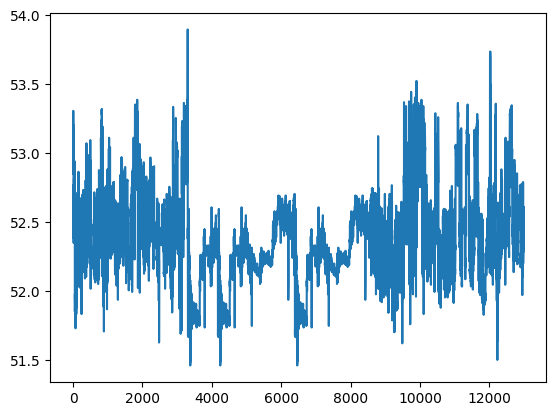

In [5]:
delta_heading_deg = np.rad2deg(delta_heading)

plt.plot(delta_heading_deg)

print("Statistics of delta_heading_deg:")
print(pd.Series(delta_heading_deg).describe())